<a href="https://colab.research.google.com/github/mcdcdcd/Business-decisions/blob/main/ETL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Data Analysis: Top Selling Products

This project analyzes sales data to identify the top-selling products based on quantity sold. The dataset contains transactional records, including product descriptions, quantities, unit prices, and customer details.

In [21]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Online Retail.xlsx to Copy of Online Retail (1).xlsx


In [8]:
path = "/content/Copy of Online Retail.xlsx"

In [9]:
df = pd.read_excel(path)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df = df[df['Quantity']> 0 ]   # Removed negative values in Quantity and UnitPrice columns. Keep only positive values

In [ ]:
df= df[df['UnitPrice'] > 0]   ## keep only positive values

In [ ]:
print(df.shape)

(530104, 8)


In [ ]:
# Análisis de la cantidad de productos vendidos por descripción

In [20]:
ventas_producto = df.groupby('Description')['Quantity'].sum().reset_index()  #Summed quantities sold per product.
# Ordenar de mayor a menor
ventas_producto = ventas_producto.sort_values(by='Quantity', ascending=False)
print(ventas_producto.head(5))


                            Description  Quantity
4009  WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866            JUMBO BAG RED RETROSPOT     47363
244       ASSORTED COLOUR BIRD ORNAMENT     36381
2740                     POPCORN HOLDER     36334
2395    PACK OF 72 RETROSPOT CAKE CASES     36039


In [ ]:
#Realizamos un histograma al momento de presentar un informe  al cliente, distribucion de cantidad por descripcion

<ipython-input-19-868be3036a73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_productos['Short_Description'] = top_10_productos['Description'].apply(lambda x: "\n".join(textwrap.wrap(x, width=5)))


<BarContainer object of 5 artists>

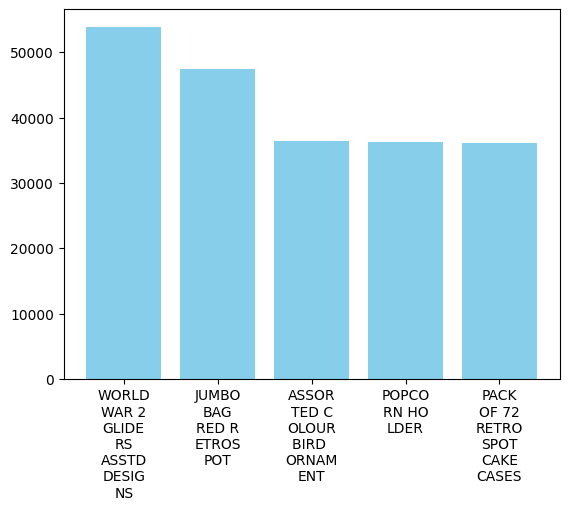

In [19]:
import textwrap

top_10_productos['Short_Description'] = top_10_productos['Description'].apply(lambda x: "\n".join(textwrap.wrap(x, width=5)))
plt.bar(top_10_productos['Short_Description'], top_10_productos['Quantity'], color="skyblue")
